In [1]:
#############################################################
#       Predicting Red Hat Business Value 
#############################################################
"""
Reference: https://www.kaggle.com/c/predicting-red-hat-business-value

The organization is an American multinational software company that provides open source software products to the 
enterprise community.Their primary product is Red Hat Enterprise Linux, the most popular distribution of Linux OS, 
used by various large enterprises. In its services, it helps organizations align their IT strategies by providing 
enterprise-grade solutions through an open business model and an affordable, predictable subscription model. 
These subscriptions from large enterprise customers create a substantial part of their revenue, and therefore it is 
of paramount importance for them to understand their valuable customers and serve them better by prioritizing 
resources and strategies to drive improved business value.

How Can We Identify a Potential Customer?
Red Hat has been in existence for over 25 years. In the long stint of business, they have accumulated and captured 
a vast amount of data from customer interactions and their descriptive attributes. This rich source of data could 
be a gold mine of patterns that can help in identifying a potential customer by studying the vast and complex 
historical patterns in the interaction data.
With the ever-growing popularity and prowess of DL, we can develop a DNN that can learn from historic customer 
attributes and operational interaction data to understand the deep patterns and predict whether a new customer will
potentially be a high-value customer for various business services.
Therefore, we will develop and train a DNN to learn the chances that a customer will be a potential high-value 
customer, using various customer attributes and operational interaction attributes.
"""
# Exploring the Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the 2 datasets provided in the Zip Folder
act_train = pd.read_csv('D:\\ml-data\\predicting-red-hat-business-value\\act_train.csv')
people = pd.read_csv('D:\\ml-data\\predicting-red-hat-business-value\\people.csv')

In [3]:
# Explore the shape of the datasets
print('Shape of DF:', act_train.shape)
print('Shape of People DF:', people.shape)

Shape of DF: (2197291, 15)
Shape of People DF: (189118, 41)


In [4]:
# Explore the contents of the first dataset
act_train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [5]:
"""
Exploring the contents of the training dataset, we can see that it mostly has customer interaction data but is 
completely anonymized. Given the confidentiality of customers and their attributes, the entire data is anonymized,
and this leaves us with little knowledge about its true nature. This is a common problem in data science. Quite 
often, the team that develops DL models faces the challenge of the data confidentiality of the end customer and is 
therefore provided only anonymized and sometimes encrypted data. This still shouldn’t be a roadblock. It is 
definitely best to have a data dictionary and complete understanding of the dataset, but nevertheless, we can still
develop models with the provided information.
"""
# Calculating the % of Null values in each column for activity data
act_train.isnull().sum()  # show sum of null

people_id                  0
activity_id                0
date                       0
activity_category          0
char_1               2039676
char_2               2039676
char_3               2039676
char_4               2039676
char_5               2039676
char_6               2039676
char_7               2039676
char_8               2039676
char_9               2039676
char_10               157615
outcome                    0
dtype: int64

In [6]:
act_train.shape[0]  # show total row count

2197291

In [7]:
# calculate percentage of null by dividing total null by total row count
act_train.isnull().sum() / act_train.shape[0]

people_id            0.000000
activity_id          0.000000
date                 0.000000
activity_category    0.000000
char_1               0.928268
char_2               0.928268
char_3               0.928268
char_4               0.928268
char_5               0.928268
char_6               0.928268
char_7               0.928268
char_8               0.928268
char_9               0.928268
char_10              0.071732
outcome              0.000000
dtype: float64

In [8]:
"""
Around nine features have more than 90% null values. We can’t do much to fix these features. Let’s move ahead
and have a look at the people dataset.
"""
# Explore the contents of People dataset
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [9]:
"""
Let’s check how many missing data points the customer dataset has. Since the customer dataset has around 40+ 
features, we can combine the missing value percentages for all columns together with the preceding code, 
instead of looking at each column individually.
"""
# Calculate the % of null values in for the entire dataset
people.isnull().sum().sum()

0

In [10]:
"""
And we see that none of the columns in the customer dataset has missing values.

To create a consolidated dataset, we need to join the activity and customer data on the people_id key. But before
we do that, we need to take care of a few things. We need to drop the columns in the activity data that have 90%
missing values, as they cannot be fixed. Secondly, the “date” and “char_10” columns are present in both datasets.
In order to avoid a name clash, let us rename the “date” column in the activity dataset to “activity_date” and 
“char_10” in the activity data as “activity_type.” Next, we also need to fix the missing values in the 
“activity_type” column. Once these two tasks are accomplished, we will join the two datasets and explore the
consolidated data.
"""
# Create the list of columns to drop from activity data
columns_to_remove = ['char_' + str(x) for x in np.arange(1, 10)]
print('Columns to remove:', columns_to_remove)

# Remove the columns from the activity data
act_train = act_train[list(set(act_train.columns) - set(columns_to_remove))]

# Rename the 2 columns to avoid name clashes in merged data
act_train = act_train.rename(columns={'date': 'activity_date', 'char_10': 'activity_type'})

# Replace nulls in the activity_type column with the mode
act_train['activity_type'] = act_train['activity_type'].fillna(act_train['activity_type'].mode()[0])

# Print the shape of the final activity dataset
print('Shape of DF:', act_train.shape)

Columns to remove: ['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9']
Shape of DF: (2197291, 6)


In [11]:
# We can now join the two datasets to create a consolidate activity and customer attributes dataset.
# Merge the 2 datasets on 'people_id' key
merged_df = act_train.merge(people, on=['people_id'], how='inner')
print('Shape before merging:', act_train.shape)
print('Shape after merging :', merged_df.shape)

Shape before merging: (2197291, 6)
Shape after merging : (2197291, 46)


In [12]:
"""
Let us now study the target (i.e., the variable we want to predict), named “outcome” in the dataset. We can check 
the distribution between potential vs. nonpotential customers.
"""
print('Unique values for outcome:', merged_df['outcome'].unique())
print('\nPercentage of distribution for outcome-')
print(merged_df['outcome'].value_counts() / merged_df.shape[0])

Unique values for outcome: [0 1]

Percentage of distribution for outcome-
0    0.556046
1    0.443954
Name: outcome, dtype: float64


In [13]:
"""
We can see that there is a good mix in the distribution of potential customers, as around 45% are potential 
customers.
"""

###########################################
#        Data Engineering
###########################################
"""
Next, given that we have 45 columns altogether to explore and transform, let’s expedite the process by automating
a few things.
"""
# Checking the distinct datatypes in the dataset.
print('Distinct DataTypes: ', list(merged_df.dtypes.unique()))

Distinct DataTypes:  [dtype('O'), dtype('int64'), dtype('bool')]


In [14]:
"""
We have numeric, categorical (Object), and Boolean features in the dataset. Boolean in Python represents a True 
or False value; we need to convert this into numeric (1 and 0) for the model to process the data.
"""
# Create a temp dataset with the datatype of columns
temp = pd.DataFrame(merged_df.dtypes)
temp.columns = ['DataType']

# Create a list with names of all Boolean columns
boolean_columns = temp.index[temp['DataType'] == 'bool'].values
print('Boolean columns - \n', boolean_columns)

# Convert all boolean columns to Binary numeric values
for column in boolean_columns:
    merged_df[column] = np.where(merged_df[column] == True, 1, 0)

print('\nDistinct DataTypes after processing:', act_train.dtypes.unique())    

Boolean columns - 
 ['char_10' 'char_11' 'char_12' 'char_13' 'char_14' 'char_15' 'char_16'
 'char_17' 'char_18' 'char_19' 'char_20' 'char_21' 'char_22' 'char_23'
 'char_24' 'char_25' 'char_26' 'char_27' 'char_28' 'char_29' 'char_30'
 'char_31' 'char_32' 'char_33' 'char_34' 'char_35' 'char_36' 'char_37']

Distinct DataTypes after processing: [dtype('O') dtype('int64')]


In [15]:
"""
Let us now have a look at the categorical features. We will first do a sanity check to understand the number of
distinct values in each of the categorical features. If there are categorical features where there are unusually
high numbers of distinct values, we have to decide if we can really convert them to a one-hot encoded structure 
for further processing.
"""
# Extracting the object columns from the above dataframe
categorical_columns = temp.index[temp['DataType'] == 'O'].values
# Check the number of distinct values in each categorical column
for column in categorical_columns:
    print(column +' column has : ', str(len(merged_df[column].unique())) + ' distinct values')   

people_id column has :  151295 distinct values
activity_category column has :  7 distinct values
activity_id column has :  2197291 distinct values
activity_date column has :  411 distinct values
activity_type column has :  6515 distinct values
char_1 column has :  2 distinct values
group_1 column has :  29899 distinct values
char_2 column has :  3 distinct values
date column has :  1196 distinct values
char_3 column has :  43 distinct values
char_4 column has :  25 distinct values
char_5 column has :  9 distinct values
char_6 column has :  7 distinct values
char_7 column has :  25 distinct values
char_8 column has :  8 distinct values
char_9 column has :  9 distinct values


In [16]:
"""
Let’s first fix the date-related columns and then huddle with the remaining categorical columns. The following code
snippet converts the date values to new features and then deletes the actual column.
"""
# Create date related features for 'date' in customer data
merged_df['date'] = pd.to_datetime(merged_df['date'])

merged_df['Year'] = merged_df['date'].dt.year
merged_df['Month'] = merged_df['date'].dt.month
merged_df['Quarter'] = merged_df['date'].dt.quarter
merged_df['Week'] = merged_df['date'].dt.week
merged_df['WeekDay'] = merged_df['date'].dt.weekday
merged_df['Day'] = merged_df['date'].dt.day

# Create date related features for 'date' in activity data
merged_df['activity_date'] = pd.to_datetime(merged_df['activity_date'])

merged_df['Activity_Year'] = merged_df['activity_date'].dt.year
merged_df['Activity_Month'] = merged_df['activity_date'].dt.month
merged_df['Activity_Quarter'] = merged_df['activity_date'].dt.quarter
merged_df['Activity_Week'] = merged_df['activity_date'].dt.week
merged_df['Activity_WeekDay'] = merged_df['activity_date'].dt.weekday
merged_df['Activity_Day'] = merged_df['activity_date'].dt.day

# Delete the original date columns
del(merged_df['date'])
del(merged_df['activity_date'])

print('Shape of data after create Date Features:', merged_df.shape)

Shape of data after create Date Features: (2197291, 56)


In [17]:
# show top 5 row
merged_df.head()

,people_id,outcome,activity_category,activity_id,activity_type,char_1,group_1,char_2,char_3,char_4,...,Quarter,Week,WeekDay,Day,Activity_Year,Activity_Month,Activity_Quarter,Activity_Week,Activity_WeekDay,Activity_Day
0,ppl_100,0,type 4,act2_1734928,type 76,type 2,group 17304,type 2,type 5,type 5,...,2,26,1,29,2023,8,3,34,5,26
1,ppl_100,0,type 2,act2_2434093,type 1,type 2,group 17304,type 2,type 5,type 5,...,2,26,1,29,2022,9,3,39,1,27
2,ppl_100,0,type 2,act2_3404049,type 1,type 2,group 17304,type 2,type 5,type 5,...,2,26,1,29,2022,9,3,39,1,27
3,ppl_100,0,type 2,act2_3651215,type 1,type 2,group 17304,type 2,type 5,type 5,...,2,26,1,29,2023,8,3,31,4,4
4,ppl_100,0,type 2,act2_4109017,type 1,type 2,group 17304,type 2,type 5,type 5,...,2,26,1,29,2023,8,3,34,5,26


In [18]:
"""
Let us now have a look at the remaining categorical columns, which have very high numbers of distinct values.
"""
print(merged_df[['people_id', 'activity_type', 'activity_id', 'group_1']].head())

  people_id activity_type   activity_id      group_1
0   ppl_100       type 76  act2_1734928  group 17304
1   ppl_100        type 1  act2_2434093  group 17304
2   ppl_100        type 1  act2_3404049  group 17304
3   ppl_100        type 1  act2_3651215  group 17304
4   ppl_100        type 1  act2_4109017  group 17304


In [19]:
"""
It seems that we can convert all of the preceding categorical columns into numeric by extracting the relevant 
numeric ID from each of them, since each of these columns has values in the form of someText_ someNumber. Rather 
than converting these categorical columns into a bloated one-hot encoded dataset, we can temporarily use them as
numeric features. However, if the performance of the model doesn’t reach our desired expectations after several
experiments, we might have to revisit these features and try our best to incorporate them differently. But for now,
we can consider them as numeric features.
"""
# For people ID, we would need to extract values after '_'
merged_df.people_id = merged_df.people_id.apply(lambda x: x.split('_')[1])
merged_df.people_id = pd.to_numeric(merged_df.people_id)

# For activity ID also, we would need to extract values after '_'
merged_df.activity_id = merged_df.activity_id.apply(lambda x: x.split('_')[1])
merged_df.activity_id = pd.to_numeric(merged_df.activity_id)

# For group_1 , we would need to extract values after ''
merged_df.group_1 = merged_df.group_1.apply(lambda x: x.split(' ')[1])
merged_df.group_1 = pd.to_numeric(merged_df.group_1)

# For activity_type , we would need to extract values after ''
merged_df.activity_type = merged_df.activity_type.apply(lambda x: x.split(' ')[1])
merged_df.activity_type = pd.to_numeric(merged_df.activity_type)

# Double check the new values in the dataframe
print(merged_df[['people_id', 'activity_id', 'activity_type', 'group_1']].head())

   people_id  activity_id  activity_type  group_1
0      100.0    1734928.0             76    17304
1      100.0    2434093.0              1    17304
2      100.0    3404049.0              1    17304
3      100.0    3651215.0              1    17304
4      100.0    4109017.0              1    17304


In [20]:
"""
let’s convert the remaining categorical columns, which have relatively low numbers of distinct values, to one-hot
encoded form and render the final consolidated dataset.
"""
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
"""
Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
"""
def create_ohe(df, col):
    le = LabelEncoder()
    a = le.fit_transform(df[col]).reshape(-1, 1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col + '_' + str(i) for i in le.classes_]
    return (pd.DataFrame(ohe.fit_transform(a), columns=column_names))

In [22]:
"""
Since the above function converts the column, one at a time We create a loop to create the final dataset 
with all features.
"""

#Creating a temporary dataframe that hosts column datatypes
temp = pd.DataFrame(merged_df.dtypes)
temp.columns = ["DataType"]

target = ['outcome']
numeric_columns = list(set(temp.index[(temp.DataType == 'float64') 
                                      | (temp.DataType == 'int64')].values) - set(target))
categorical_columns = temp.index[temp.DataType == "O"].values

print("\nTarget column :\n",target)
print("\nNumeric columns :\n",numeric_columns)
print("\nCategorical columns :\n",categorical_columns)

temp = merged_df[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(merged_df, column)
    temp = pd.concat([temp, temp_df], axis=1)
print('\nShape of final df after onehot encoding:', temp.shape)  


Target column :
 ['outcome']

Numeric columns :
 ['people_id', 'Month', 'char_38', 'Activity_Week', 'Year', 'Activity_Month', 'Activity_WeekDay', 'Day', 'group_1', 'Week', 'Activity_Day', 'WeekDay', 'activity_id', 'Quarter', 'activity_type', 'Activity_Quarter', 'Activity_Year']

Categorical columns :
 ['activity_category' 'char_1' 'char_2' 'char_3' 'char_4' 'char_5' 'char_6'
 'char_7' 'char_8' 'char_9']


D:\anaconda3\envs\ml-env\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\anaconda3\envs\ml-env\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us


Shape of final df after onehot encoding: (2197291, 155)


In [23]:
from sklearn.model_selection import train_test_split

# split the final dataset into train and test with 80:20
x_train, x_test, y_train, y_test = train_test_split(temp, merged_df[target], test_size=0.2, random_state=2018)

# split the train dataset further into train and validation with 90:10
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2018)

# Check the shape of each new dataset created
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (1582048, 155)
Shape of x_test: (439459, 155)
Shape of x_val: (175784, 155)
Shape of y_train: (1582048, 1)
Shape of y_test: (439459, 1)
Shape of y_val: (175784, 1)


In [24]:
"""
For now, we have the training data in the desired form for building DL models for classification. We need to define
a baseline benchmark that will help us set the threshold performance we should expect from our models
for them to be considered useful and acceptable.
"""

##################################################
#          Model Baseline Accuracy
##################################################
"""
For all supervised classification use cases, our target variable would be a binary or multiclass (more than two
classes) outcome. In our use case, we have the outcome as either 0 or 1. To validate the usefulness of a model, we
should compare the result to what would have happened if we never had a model. In that case, we would make the
largest class as the prediction for all customers and check what the accuracy looks like.
If you remember, the target in our use case (i.e., the outcome variable) has a good distribution of 1’s and 0’s.
Here is the distribution of the outcome variable between 1 and 0.
"""
# Checking the distribution of values in the target
merged_df['outcome'].value_counts() / merged_df.shape[0]

0    0.556046
1    0.443954
Name: outcome, dtype: float64

In [25]:
"""
So, with the preceding distribution, we can say that if we do not have any model and make all predictions as 0
(the largest class)—that is, predicting that none of the customers are potential high-value customers—then we
would end up with at least 55.6% accuracy either way. This is our baseline accuracy. If we build a model that
delivers us an overall accuracy anywhere below our benchmark, then it would be of practically no use.
"""

##################################################
#       Designing the DNN for Classification
##################################################
"""
For this use case, we have somewhat larger datasets. The training process might be more time-consuming than that
of the regression use case. To save our time and be able to quickly get a well-functioning architecture in
place, we will use a simple strategy. We will start with just three epochs for each kind of network we will
experiment with, and once we find promising results, we will retrain the best architecture with the desired number
of epochs for improved results.
"""

"""
Rule 1: Start small
The following code snippet builds a DNN with just one layer and 256 neurons. We have used binary_crossentropy
(since this a binary classification problem) as the loss function and accuracy as the metric to monitor. For
classification problems, we can use several other metrics available within Keras, but accuracy is simple and fairly
straightforward to comprehend. We will train the network for just three epochs and keep monitoring the loss as 
well as the accuracy on the training and validation dataset. If we don’t see promising results, we might have to
try a new architecture.
"""
from keras.models import Sequential
from keras.layers import Dense

# Design the deep neural network [Small + 1 layer] architecture
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # activation=sigmoid for binary classification

# compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=64)

Using TensorFlow backend.


Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 101s 64us/step - loss: 8.3087 - acc: 0.4804 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 2/3
1582048/1582048 [==============================] - 133s 84us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 3/3
1582048/1582048 [==============================] - 118s 75us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455


In [26]:
"""
If you closely observe the results from the training output, you will see that the overall accuracy for training
as well as validation datasets was around 0.44 (44%), which is way lower than our baseline accuracy. We can
therefore conclude that training this model further might not be a fruitful idea.
Let’s try a deeper network for the same number of neurons. So, we keep everything the same but add one more layer
with the same number of neurons.
"""
# Design the deep neural network [Small + 2 layers]
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # activation=sigmoid for binary classification

# compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 183s 115us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 2/3
1582048/1582048 [==============================] - 160s 101us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 3/3
1582048/1582048 [==============================] - 163s 103us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455


In [27]:
"""
Again, as we can see, the initial results are not at all promising. The training and validation accuracy from the
deeper network are not anywhere close to what we would expect. Instead of trying another deeper network
with, say, three to five layers, let us try training with a bigger (medium-sized) network. We shall use a new
architecture with just one layer but 512 neurons this time. Let us again train for three epochs and have a look
at the metrics to check whether it is in line with what we would expect.
"""
# Design the deep neural network [Medium + 1 layers]
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 156s 99us/step - loss: 7.1583 - acc: 0.5559 - val_loss: 7.1813 - val_acc: 0.5545
Epoch 2/3
1582048/1582048 [==============================] - 148s 93us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545
Epoch 3/3
1582048/1582048 [==============================] - 140s 89us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545


In [28]:
"""
The medium-sized network too returned disappointing results. The training and validation accuracy from the 
medium-sized network are not really close to what we would expect. Let’s now try increasing the depth for
the medium-sized network to see if the results improve.
"""
# Design the deep neural network [Medium + 2 layers]
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 427s 270us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545
Epoch 2/3
1582048/1582048 [==============================] - 414s 262us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545


In [31]:
"""
We can see that the results have improved, but only by just a bit. We see an accuracy of around 55% for the 
training and validation datasets, but these results are again not great so we have to revisit our dataset.
"""

###################################################
#            Revisiting the Data
###################################################
"""
We can standardize the input data with a ‘Standardscaler’ or a ‘Minmaxscaler’ using Python’s sklearn package’s
tools or we can explore the options to revisit the one-hot encoding exercise for the categorical features we
encoded as numeric. From these two options, the easiest and the least time-consuming would be standardizing or
normalizing the data.
"""

##################################################
#   Standardize, Normalize, or Scale the Data
##################################################
"""
it is a good practice to standardize or normalize the data before providing it as training data for the DL models.
However, in our classification use case, we can see that the performance is very poor on the raw data. To improve
our model performance, let us try standardizing our data. (Alternatively, you can normalize the data too.)
In standardization, we transform the data into a form where the mean is 0 and the standard deviation is 1. The
distribution of the data in this form is a great input candidate for our neuron’s activation function and
therefore improves the ability to learn more appropriately.
"""
from sklearn.preprocessing import StandardScaler

# Create a dummy input
dummy_input = np.arange(1, 10)
print('Dummy Input = ', dummy_input)

# Create a standardscaler instance and fit the data
scaler = StandardScaler()
output = scaler.fit_transform(dummy_input.reshape(-1, 1))
print('Output =\n ', list(output))
print('Output Mean = ', output.mean())
print('Output Std Dev = ', output.std())
print('\nAfter Inverse Transforming = \n ', list(scaler.inverse_transform(output)))

Dummy Input =  [1 2 3 4 5 6 7 8 9]
Output =
  [array([-1.54919334]), array([-1.161895]), array([-0.77459667]), array([-0.38729833]), array([0.]), array([0.38729833]), array([0.77459667]), array([1.161895]), array([1.54919334])]
Output Mean =  0.0
Output Std Dev =  1.0

After Inverse Transforming = 
  [array([1.]), array([2.]), array([3.]), array([4.]), array([5.]), array([6.]), array([7.]), array([8.]), array([9.])]


D:\anaconda3\envs\ml-env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda3\envs\ml-env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
###############################################
#       Transforming the Input Data
###############################################
"""
To transform the input data for the development of the model, please note that we should only use the training data
to fit the scaler transformation and use the same fitted object to transform the validation and test input data.
"""
from sklearn.preprocessing import StandardScaler

# uses the x_train dataset to fit and transform the scaled values for all three datasets
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

D:\anaconda3\envs\ml-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda3\envs\ml-env\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
D:\anaconda3\envs\ml-env\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
D:\anaconda3\envs\ml-env\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [33]:
"""
Now that we have the standard scaled datasets, we can provide this newly augmented data for training. 
Please note that we haven’t made any transformations to the labels or the target.
"""

####################################################
#      DNNs for Classification with Improved Data
####################################################
"""
Let us now start with a medium-sized network to see if we get improved results. 
We will start with just three epochs.
"""
from keras import Sequential
from keras.layers import Dense

# Design the deep neural network [Medium + 2 layers]
model = Sequential()
model.add(Dense(512, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 157s 99us/step - loss: 0.2517 - acc: 0.8891 - val_loss: 0.2150 - val_acc: 0.9107
Epoch 2/3
1582048/1582048 [==============================] - 151s 95us/step - loss: 0.2016 - acc: 0.9183 - val_loss: 0.1876 - val_acc: 0.9259
Epoch 3/3
1582048/1582048 [==============================] - 142s 89us/step - loss: 0.1778 - acc: 0.9308 - val_loss: 0.1792 - val_acc: 0.9300


In [34]:
"""
We can see the drastic improvement in the performance of the network in providing the standardized datasets.
We have an almost 93% accuracy on the training and validation datasets. Let’s use this model to evaluate the
model performance on the test datasets.
"""
result = model.evaluate(x_test_scaled, y_test)
for i in range(len(model.metrics_names)):
    print('Metric ', model.metrics_names[i], ':', str(round(result[i], 2)))

439459/439459 [==============================] - 23s 52us/step
Metric  loss : 0.18
Metric  acc : 0.93


In [37]:
"""
We see great results on the test dataset. Let’s try improving the architecture a bit and see. We can a medium-sized
deeper network to see if the results are better than with the medium-sized network.
"""
# Designing the Deep Neural Network [Medium – 2 Layers]
model = Sequential()
model.add(Dense(512, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 425s 269us/step - loss: 0.2167 - acc: 0.9051 - val_loss: 0.1685 - val_acc: 0.9285
Epoch 2/3
1582048/1582048 [==============================] - 303s 191us/step - loss: 0.1401 - acc: 0.9435 - val_loss: 0.1258 - val_acc: 0.9502
Epoch 3/3
1582048/1582048 [==============================] - 332s 210us/step - loss: 0.1105 - acc: 0.9567 - val_loss: 0.1052 - val_acc: 0.9594


In [ ]:
"""
The training and validation accuracy has improved even further to 95%. This small increase with just 3 epochs is
awesome. We can now be confident of the performance for the model with the architecture.
let’s take a final shot with a larger and deeper network and see the results with 3 epochs. In case we see only
small improvements, we will use the same architecture for 15 epochs and use the model for our final predictions.
"""
# Designing the network Deep Neural Network – [Large + 2 Layers]
model = Sequential()
model.add(Dense(1024, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 1070s 677us/step - loss: 0.2156 - acc: 0.9053 - val_loss: 0.1591 - val_acc: 0.9337
Epoch 2/3
1581184/1582048 [============================>.] - ETA: 0s - loss: 0.1077 - acc: 0.9578

In [40]:
"""
We see an overall accuracy on the validation dataset as 96% and a similar score for the training dataset. So,
there really isn’t a lot of improvement in the performance of the model due to increasing the size from a medium
(512-neuron) to a larger (1024-neuron) architecture.
let’s train a medium-sized (512-neuron) deep network with two layers for 15 epochs, look at the final training
and validation accuracy, and then use the trained model to evaluate the test datasets.
"""
# Designing the network Deep Neural Network – [Medium + 2 Layers]
model = Sequential()
model.add(Dense(512, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=15, batch_size=64)

"""
The final model with a medium-size architecture of 512 neurons and two layers gave great performance results on
the training and validation datasets. We have an accuracy of ~98% for both datasets. Let us now
validate the model performance on the test dataset.
"""
result = model.evaluate(x_test_scaled, y_test)
for i in range(len(model.metrics_names)):
    print('Metric ', model.metrics_names[i], ':', str(round(result[i], 2)))

Train on 1582048 samples, validate on 175784 samples
Epoch 1/15
1582048/1582048 [==============================] - 325s 206us/step - loss: 0.2156 - acc: 0.9058 - val_loss: 0.1615 - val_acc: 0.9330
Epoch 2/15
 742144/1582048 [=============>................] - ETA: 2:53 - loss: 0.1472 - acc: 0.9403

KeyboardInterrupt: 

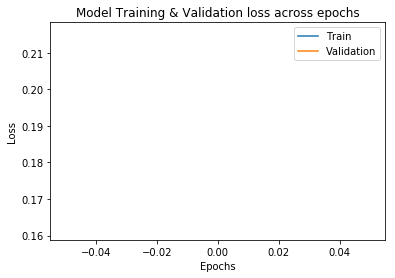

In [41]:
"""
The performance on the unseen test dataset is also great and consistent. Our model is performing really well on
the test dataset. Let us have a look at the loss curve for the model, just like we did for the regression use 
case. We will plot the loss in each epoch (15 in total for this mode) for the training and validation datasets.
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Training & Validation loss across epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

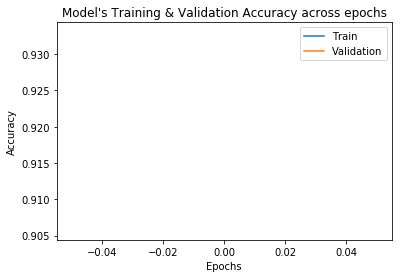

In [42]:
"""
We can see decreasing loss across both datasets. Similarly, let’s have a look at the accuracy metric during the
model training. The accuracy metric for the training and validation datasets is also stored in the model history.
"""
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()